In [138]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pn
print(    'asd' )

asd


In [139]:
df = yf.download('ETH-USD', start='2017-01-01') #df = data frame

[*********************100%***********************]  1 of 1 completed


In [140]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...
2022-05-25,1978.677002,2014.369507,1943.938599,1944.827881,1944.827881,13364545730
2022-05-26,1945.033325,1962.171143,1759.199585,1803.913330,1803.913330,23458681818
2022-05-27,1802.543823,1814.656494,1721.264771,1724.922852,1724.922852,25470760032


In [141]:
def strategy(df, sma1, sma2):
    df = df.copy()
    df['ret'] = np.log(df.Close.pct_change() + 1)
    df['SMA1'] = df.Close.rolling(sma1).mean()
    df['SMA2'] = df.Close.rolling(sma2).mean()
    df = df.dropna()
    df['position'] = np.where(df['SMA1'] > df['SMA2'], 1, 0) # position = position to buy/sell
    df['strat'] = df['position'].shift(1) * df['ret']
    df = df.dropna()
    
    return df
    

In [142]:
def performance(df): 
    return np.exp(df[['ret', 'strat']].sum())

In [143]:
performance(strategy(df, 20, 50))

ret       2.407132
strat    12.740894
dtype: float64

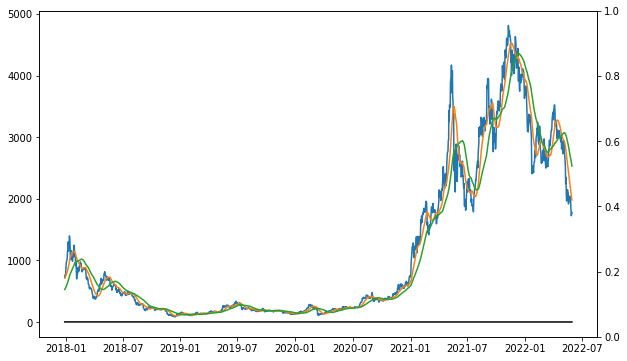

In [144]:
stratdf = strategy(df, 20, 50)
fig, ax = plt.subplots(figsize=(10,6))
ax2 = ax.twinx()
ax.plot(stratdf[['Close', 'SMA1', 'SMA2']])
ax.plot(stratdf['position'], color='k')

In [145]:
SMA_list1 = range(30, 101, 5) # <- this is for the short term sma
SMA_list2 = range(130, 201, 5) # <- Long term SMA


In [146]:
def Tester(SMAlist1, SMAlist2):
    profits = []
    short_sma,long_sma = [],[]

    for i,e in zip(SMA_list1, SMA_list2): # i = sma short    e = sma long
        profit = performance(strategy(df, i, e))
        profits.append(profit)
        short_sma.append(i)
        long_sma.append(e)
        
    col = {'level_0':'SMA1', 'level_1':'SMA2'}
    frame = pn.DataFrame(profits, [short_sma,long_sma]).reset_index().rename(columns=col)
    frame['edge'] = frame.strat - frame.ret
    return frame.sort_values('edge', ascending=False)



In [147]:
Tester(SMA_list1, SMA_list2)

,SMA1,SMA2,ret,strat,edge
13,95,195,2.738922,14.571947,11.833025
10,80,180,2.353792,14.068580,11.714788
12,90,190,2.637469,14.017655,11.380186
14,100,200,3.097976,13.882568,10.784592
11,85,185,2.585988,13.169676,10.583688
9,75,175,2.581845,9.651801,7.069956
0,30,130,3.293663,10.346445,7.052781
1,35,135,3.287712,9.481980,6.194268
3,45,145,4.591090,10.215144,5.624054
8,70,170,2.741923,7.757772,5.015849
